In [56]:
# imports
from osgeo import gdal
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# consts
predictedLandcoverLocation = 'data/predicted_lc.tif'
targetLandcoverLocation = 'data/target_lc.tif'

landcovertypes = {11 : 'Open Water', 21 : 'Developed - open space', 22 : 'Developed - low', 
                  23 : 'Developed - med', 24 : 'Developed - high', 31 : 'Barren Land',
                  42 : 'Evergreen Forest', 43 : 'Mixed Forest',
                  52 : 'Shrub/Scrub', 71 : 'Grassland/Herbaceous',
                  82 : 'Cultivated Crops', 90 : 'Woody Wetlands',
                  95 : 'Emergent Herbaceous Wetlands'}

In [14]:
def openGeoTiff(location):   
    dataset = gdal.Open(location, gdal.GA_ReadOnly)
    array = np.array([dataset.GetRasterBand(1).ReadAsArray().flatten()])
    for x in range(2, dataset.RasterCount + 1):
        band = dataset.GetRasterBand(x)
        array = np.append(array,[band.ReadAsArray().flatten()],axis=0)
    
    dataset = None
    return array[0]


In [52]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          yTitle = 'True Values',
                          xTitle = 'Predicted Values'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    #print('Confusion matrix')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        fmt = '.2f'
    else:
        fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel(yTitle)
    plt.xlabel(xTitle)
    

In [16]:
predicted = openGeoTiff(predictedLandcoverLocation)
target = openGeoTiff(targetLandcoverLocation)

print (predicted, target)

[21 21 31 ..., 21 21 21] [23 23 22 ..., 23 23 23]


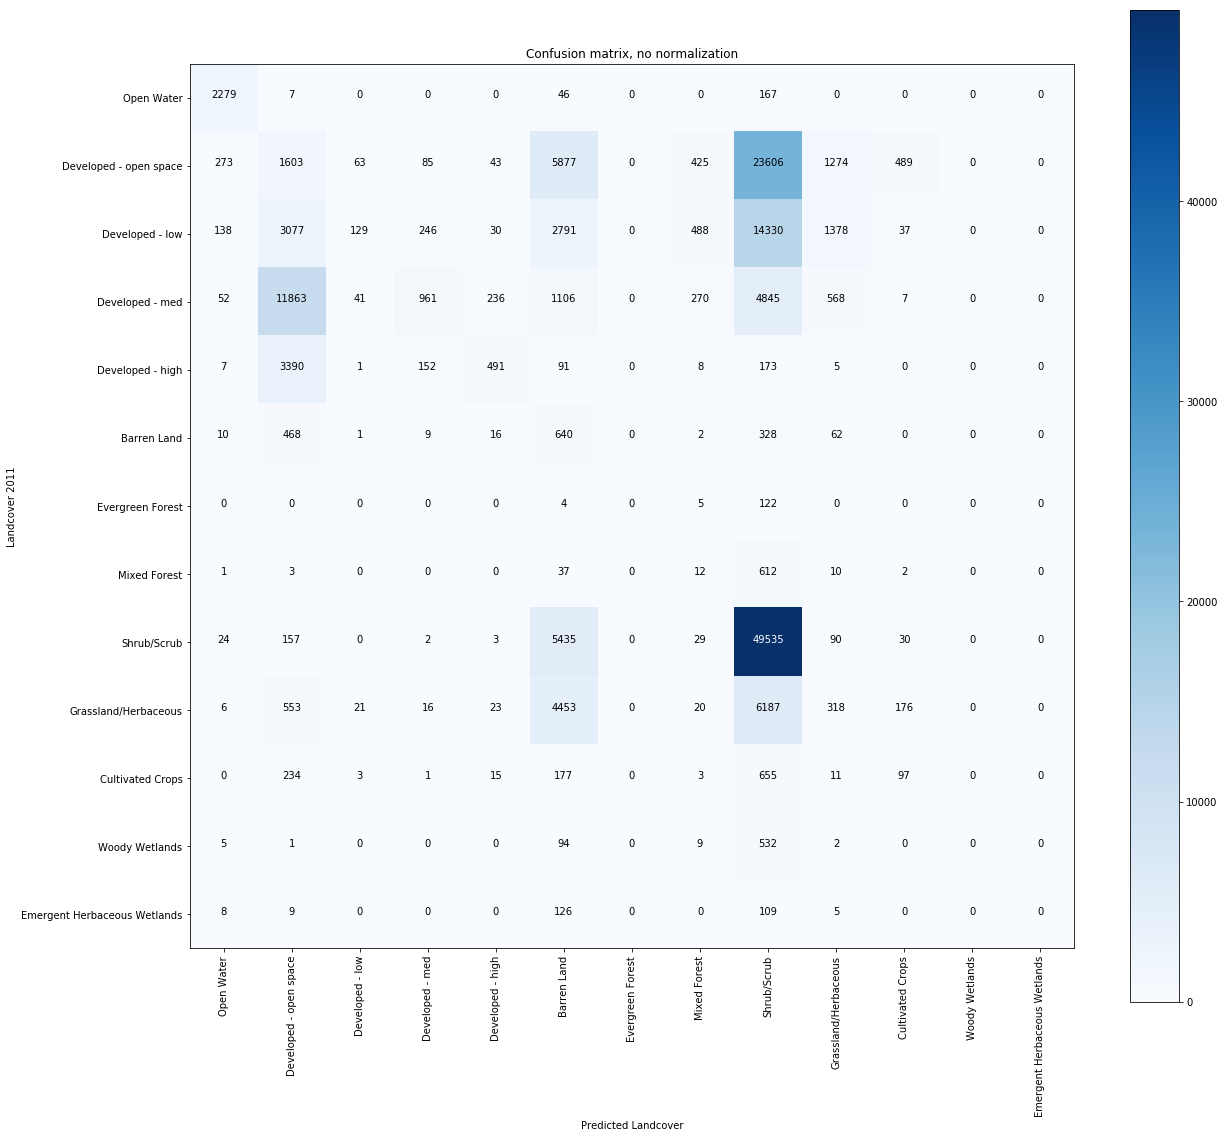

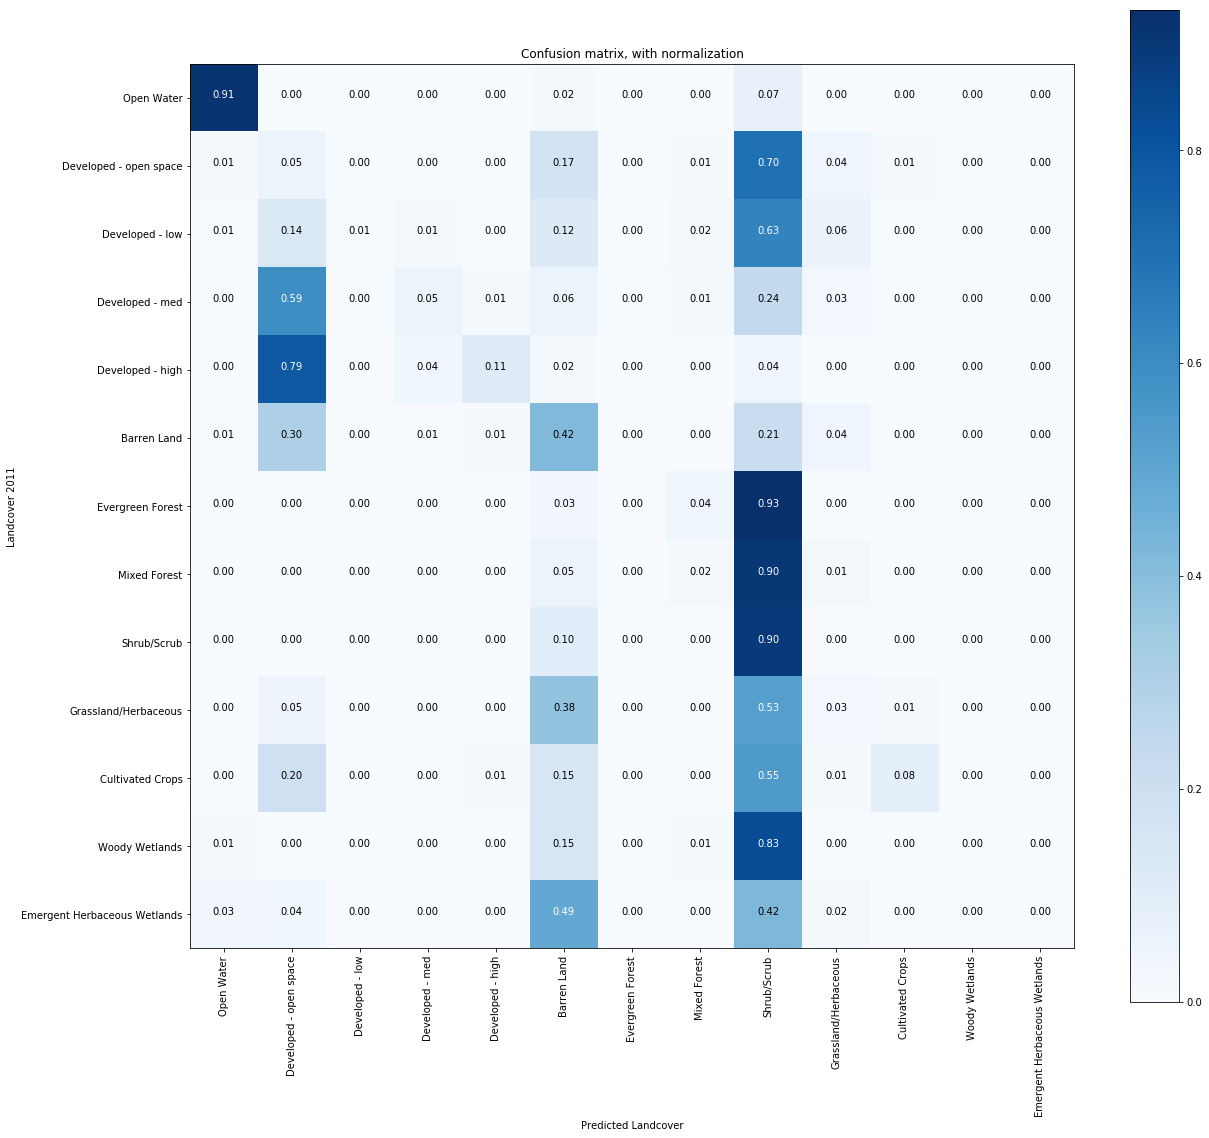

In [54]:
# confusion matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(target, predicted, labels = list(landcovertypes.keys()))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(18, 16))
plot_confusion_matrix(cnf_matrix, classes=list(landcovertypes.values()),
                      normalize = False,
                      title='Confusion matrix, no normalization', 
                      yTitle = 'Landcover 2011', xTitle = 'Predicted Landcover')

# Compute confusion matrix
cnf_matrix = confusion_matrix(target, predicted, labels = list(landcovertypes.keys()))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(18, 16))
plot_confusion_matrix(cnf_matrix, classes=list(landcovertypes.values()),
                      normalize = True,
                      title='Confusion matrix, with normalization', 
                      yTitle = 'Landcover 2011', xTitle = 'Predicted Landcover')
plt.show()

In [68]:
print(classification_report(target, predicted, 
                                       labels = list(landcovertypes.keys()), 
                                       target_names = list(landcovertypes.values())))



                              precision    recall  f1-score   support

                  Open Water       0.81      0.91      0.86      2499
      Developed - open space       0.07      0.05      0.06     33738
             Developed - low       0.50      0.01      0.01     22644
             Developed - med       0.65      0.05      0.09     19949
            Developed - high       0.57      0.11      0.19      4318
                 Barren Land       0.03      0.42      0.06      1536
            Evergreen Forest       0.00      0.00      0.00       131
                Mixed Forest       0.01      0.02      0.01       677
                 Shrub/Scrub       0.49      0.90      0.63     55305
        Grassland/Herbaceous       0.09      0.03      0.04     11773
            Cultivated Crops       0.12      0.08      0.10      1196
              Woody Wetlands       0.00      0.00      0.00       643
Emergent Herbaceous Wetlands       0.00      0.00      0.00       257

                 a

/Users/federicorodriguez/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
